## SALES PREDICTION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report

In [3]:
sales = pd.read_csv("C:/Users/akinw/Downloads/advertising.csv")
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Analysis

In [7]:
# Check for missing value
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# Check for duplicate
sales.duplicated().sum()

0

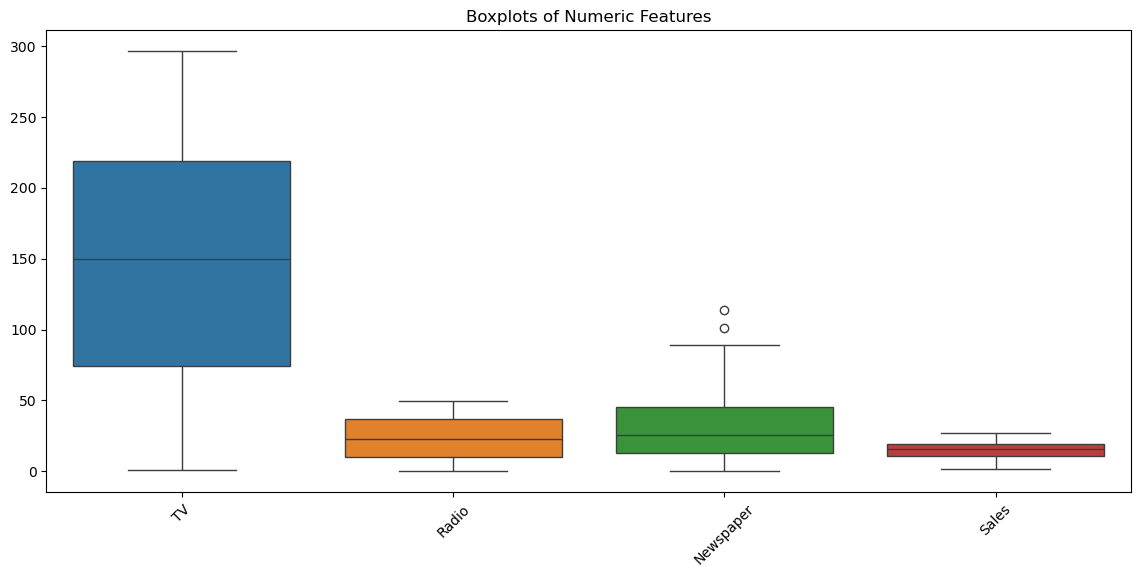

In [9]:
# Check for outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=sales)
plt.xticks(rotation=45)
plt.title("Boxplots of Numeric Features")
plt.show()

In [10]:
print (f"Max Newspaper Sold is {sales['Newspaper'].max()}")   #There is possibility of that, therefore no outlier

Max Newspaper Sold is 114.0


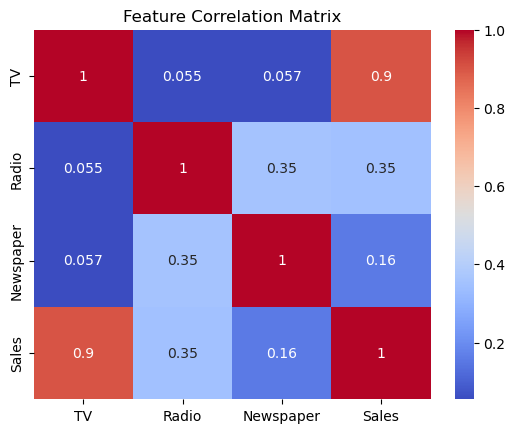

In [11]:
#correlation heatmap
sns.heatmap(sales.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

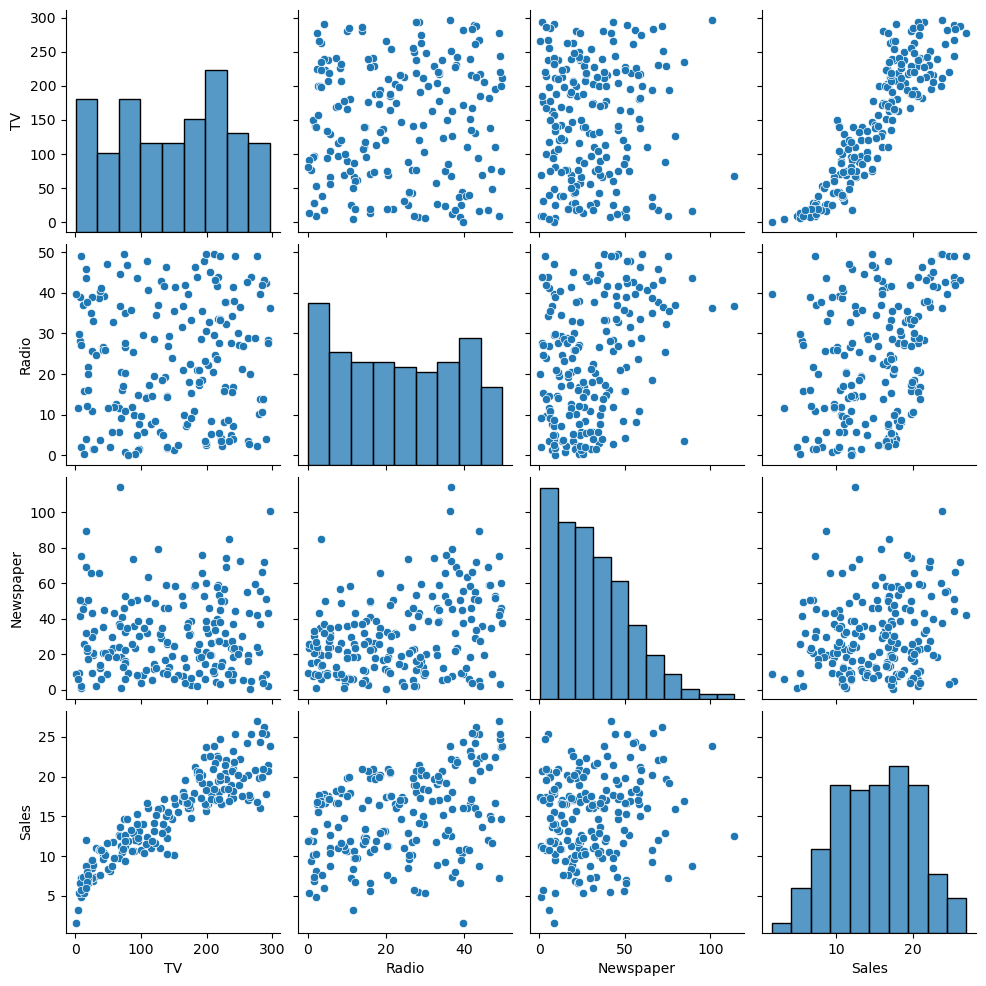

In [12]:
#Pairplot
sns.pairplot(sales)
plt.show()

## Split Dataset

In [14]:
X = sales[['TV', 'Radio', 'Newspaper']]
y = sales['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [16]:
from lazypredict.Supervised import LazyRegressor  #to select the best models before tunning

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3
[LightGBM] [Info] Start training from score 15.330625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

## Train the top 5 models in lazypredict and also tune them

In [18]:
#Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

param_grid_et = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_et = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid_et, cv=5, scoring='r2', n_jobs=-1)
grid_et.fit(X_train, y_train)

best_et = grid_et.best_estimator_
y_pred_et = best_et.predict(X_test)

print("ExtraTreesRegressor")
print("Best Params:", grid_et.best_params_)
print("R2 Score:", r2_score(y_test, y_pred_et))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_et)))
print("MAE:", mean_absolute_error(y_test, y_pred_et))
print("MSE:", mean_squared_error(y_test, y_pred_et))

ExtraTreesRegressor
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
R2 Score: 0.9599614201975551
RMSE: 1.11231117873252
MAE: 0.7796416666666701
MSE: 1.2372361583333278


In [19]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='r2', n_jobs=-1)
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

print("\nGradientBoostingRegressor")
print("Best Params:", grid_gb.best_params_)
print("R2 Score:", r2_score(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))


GradientBoostingRegressor
Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
R2 Score: 0.9432695145910724
RMSE: 1.3240220552052033
MAE: 0.8881360122505277
MSE: 1.7530344026698104


In [20]:
#for randomforest regressor
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nRandomForestRegressor")
print("Best Params:", grid_rf.best_params_)
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


RandomForestRegressor
Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
R2 Score: 0.952844707348761
RMSE: 1.207124854248806
MAE: 0.9214009920634917
MSE: 1.457150413745201


In [21]:
#For XGBoost Regressor
from xgboost import XGBRegressor

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}

grid_xgb = GridSearchCV(XGBRegressor(random_state=42, verbosity=0), param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("\nXGBRegressor")
print("Best Params:", grid_xgb.best_params_)
print("R2 Score:", r2_score(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))


XGBRegressor
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R2 Score: 0.9523948312404842
RMSE: 1.21286935832128
MAE: 0.9438189148902891
MSE: 1.4710520803546734


In [22]:
#For Bagging Regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

param_grid_bag = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.8, 1.0],
    'estimator': [DecisionTreeRegressor(max_depth=5), DecisionTreeRegressor(max_depth=10)],
}

grid_bag = GridSearchCV(BaggingRegressor(random_state=42), param_grid_bag, cv=5, scoring='r2', n_jobs=-1)
grid_bag.fit(X_train, y_train)

best_bag = grid_bag.best_estimator_
y_pred_bag = best_bag.predict(X_test)

print("\nBaggingRegressor")
print("Best Params:", grid_bag.best_params_)
print("R2 Score:", r2_score(y_test, y_pred_bag))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_bag)))
print("MAE:", mean_absolute_error(y_test, y_pred_bag))
print("MSE:", mean_squared_error(y_test, y_pred_bag))


BaggingRegressor
Best Params: {'estimator': DecisionTreeRegressor(max_depth=10), 'max_samples': 1.0, 'n_estimators': 100}
R2 Score: 0.9533928684420825
RMSE: 1.2000881771704803
MAE: 0.9317505753968257
MSE: 1.440211632984366


## Evaluation and Comparation

In [24]:
# Prepare an empty list to store results
regression_results = []

# Define a helper function for regression evaluation
def evaluate_regression_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    regression_results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MAE': round(mae, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4)
    })

# Example usage after training and tuning the models
evaluate_regression_model('Random Forest', best_rf, X_test, y_test)
evaluate_regression_model('XGBoost', best_xgb, X_test, y_test)
evaluate_regression_model('Gradient Boosting', best_gb, X_test, y_test)
evaluate_regression_model('Bagging Regressor', best_bag, X_test, y_test)
evaluate_regression_model('Extra Trees', best_et, X_test, y_test)

# Create DataFrame
results_sales = pd.DataFrame(regression_results)
results_sales = results_sales.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

# Display the table
print(results_sales)

               Model  R2 Score  MAE  MSE  RMSE
0        Extra Trees      0.96 0.78 1.24  1.11
1  Bagging Regressor      0.95 0.93 1.44  1.20
2      Random Forest      0.95 0.92 1.46  1.21
3            XGBoost      0.95 0.94 1.47  1.21
4  Gradient Boosting      0.94 0.89 1.75  1.32


## Visualise the result

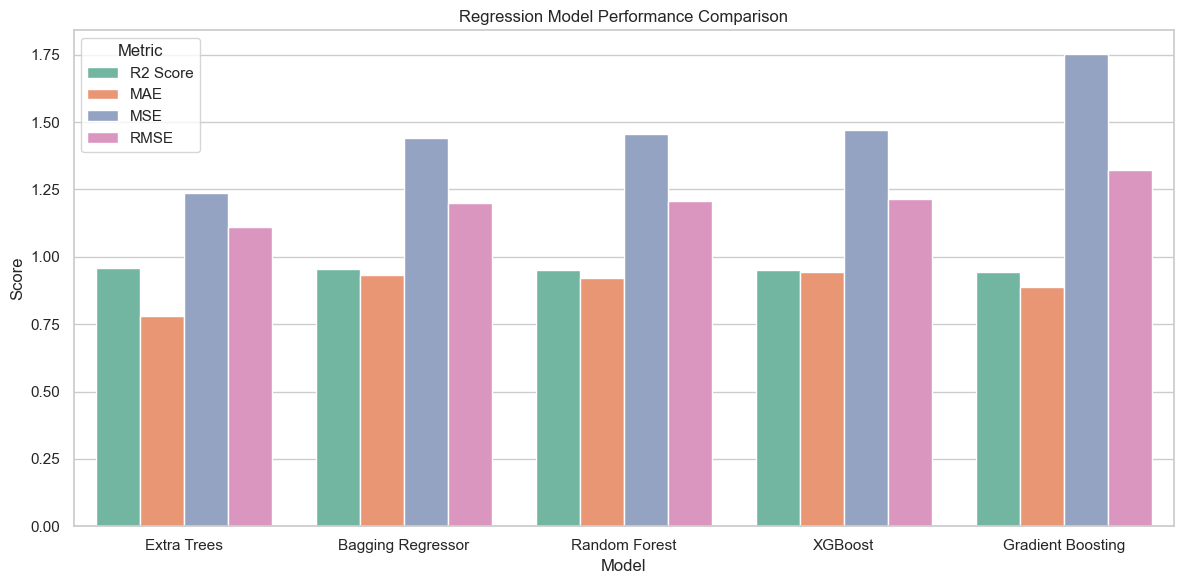

In [26]:
# Melt the DataFrame for seaborn
results_melted = pd.melt(results_sales, id_vars='Model', 
                         value_vars=['R2 Score', 'MAE', 'MSE', 'RMSE'],
                         var_name='Metric', value_name='Score')

# Set the visual style
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette='Set2')

# Show plot
plt.title('Regression Model Performance Comparison')
plt.tight_layout()
plt.show()

## Actual vs Predicted Value

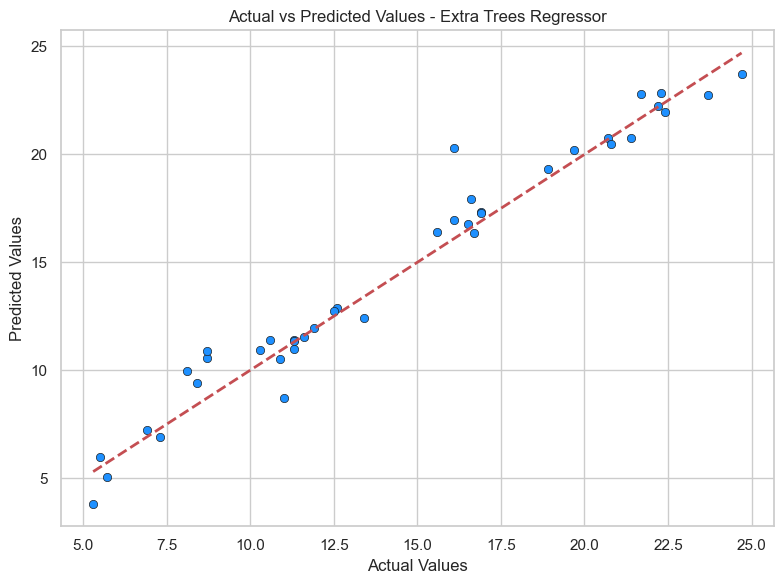

In [28]:
# Predict using your best model
y_pred = best_et.predict(X_test)  # Replace with your model if different

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', edgecolor='k')

# Plot a diagonal reference line (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Extra Trees Regressor')

plt.tight_layout()
plt.show()

## Residual plot

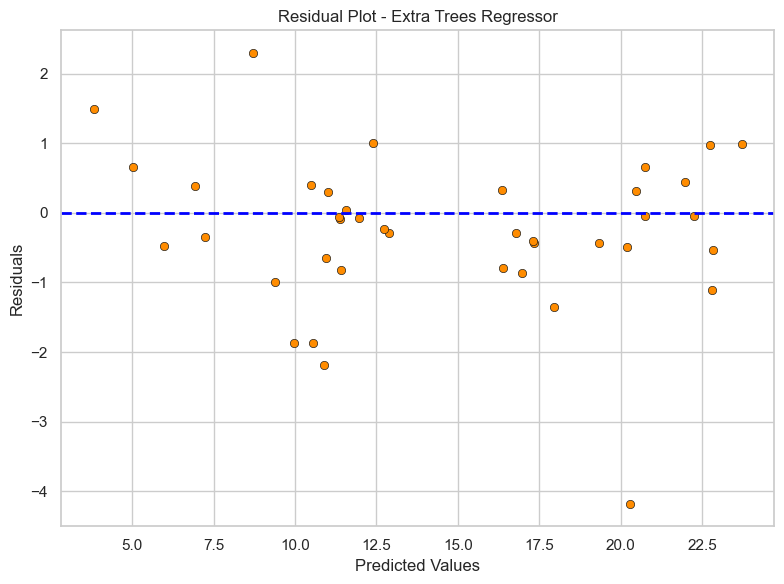

In [30]:
# Predict values
y_pred = best_et.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='darkorange', edgecolor='k')

# Add horizontal line at 0
plt.axhline(y=0, color='blue', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Extra Trees Regressor')

plt.tight_layout()
plt.show()


## The most influencial features

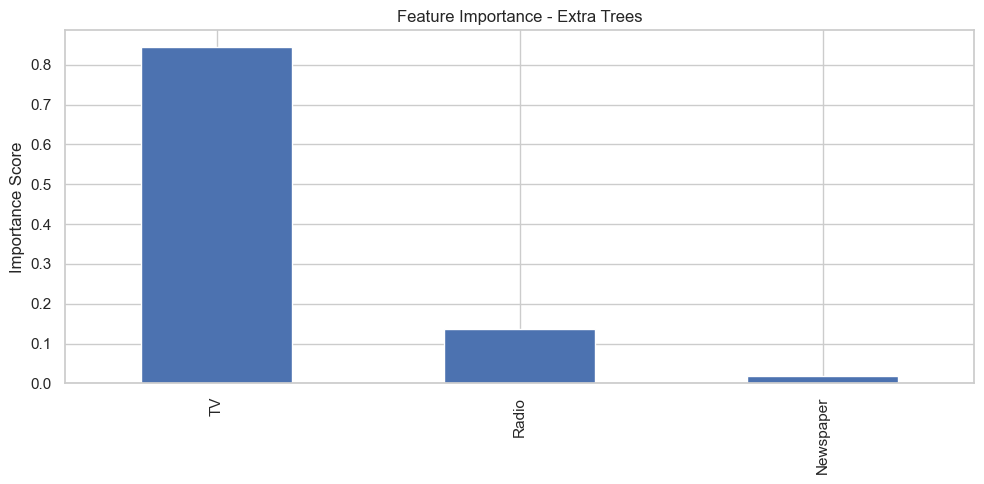

In [57]:
# which features influenced the prediction most
feature_importances = pd.Series(best_et.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance - Extra Trees")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
